In [1]:
import loompy as lp
import glob
import os
import pickle
import matplotlib.pyplot as plt

%load_ext lab_black

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
seurat_path_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(glob.glob("*k/cell_type_classification/*.txt"))
}
seurat_path_dict

{'BIO_ddseq_1.10k': '10k/cell_type_classification/BIO_ddseq_1.10k__cell_type_seurat.txt',
 'BIO_ddseq_2.10k': '10k/cell_type_classification/BIO_ddseq_2.10k__cell_type_seurat.txt',
 'BIO_ddseq_3.10k': '10k/cell_type_classification/BIO_ddseq_3.10k__cell_type_seurat.txt',
 'BIO_ddseq_4.10k': '10k/cell_type_classification/BIO_ddseq_4.10k__cell_type_seurat.txt',
 'BRO_mtscatac_1.10k': '10k/cell_type_classification/BRO_mtscatac_1.10k__cell_type_seurat.txt',
 'BRO_mtscatac_2.10k': '10k/cell_type_classification/BRO_mtscatac_2.10k__cell_type_seurat.txt',
 'CNA_10xmultiome_1.10k': '10k/cell_type_classification/CNA_10xmultiome_1.10k__cell_type_seurat.txt',
 'CNA_10xmultiome_2.10k': '10k/cell_type_classification/CNA_10xmultiome_2.10k__cell_type_seurat.txt',
 'CNA_10xv11_1.10k': '10k/cell_type_classification/CNA_10xv11_1.10k__cell_type_seurat.txt',
 'CNA_10xv11_2.10k': '10k/cell_type_classification/CNA_10xv11_2.10k__cell_type_seurat.txt',
 'CNA_10xv11_3.10k': '10k/cell_type_classification/CNA_10xv1

In [4]:
depth_alias_dict = {
    "5k": 5000,
    "10k": 10000,
    "15k": 15000,
    "20k": 20000,
    "25k": 25000,
    "30k": 30000,
    "35k": 35000,
    "FIXEDCELLS": 40000,
}

In [5]:
df_merged = pd.DataFrame()
for sample, path in seurat_path_dict.items():
    print(sample)
    depth = sample.split(".")[-1]
    depth_alias = depth_alias_dict[depth]
    print(depth)
    df = pd.read_csv(path, sep="\t")
    df["depth"] = depth
    df["depth_alias"] = depth_alias
    df_merged = pd.concat([df_merged, df])

BIO_ddseq_1.10k
10k
BIO_ddseq_2.10k
10k
BIO_ddseq_3.10k
10k
BIO_ddseq_4.10k
10k
BRO_mtscatac_1.10k
10k
BRO_mtscatac_2.10k
10k
CNA_10xmultiome_1.10k
10k
CNA_10xmultiome_2.10k
10k
CNA_10xv11_1.10k
10k
CNA_10xv11_2.10k
10k
CNA_10xv11_3.10k
10k
CNA_10xv11_4.10k
10k
CNA_10xv11_5.10k
10k
CNA_10xv2_1.10k
10k
CNA_10xv2_2.10k
10k
CNA_hydrop_1.10k
10k
CNA_hydrop_2.10k
10k
CNA_hydrop_3.10k
10k
CNA_mtscatac_1.10k
10k
CNA_mtscatac_2.10k
10k
EPF_hydrop_1.10k
10k
EPF_hydrop_2.10k
10k
EPF_hydrop_3.10k
10k
EPF_hydrop_4.10k
10k
HAR_ddseq_1.10k
10k
HAR_ddseq_2.10k
10k
MDC_mtscatac_1.10k
10k
MDC_mtscatac_2.10k
10k
OHS_s3atac_1.10k
10k
OHS_s3atac_2.10k
10k
SAN_10xmultiome_1.10k
10k
SAN_10xmultiome_2.10k
10k
STA_10xv11_1.10k
10k
STA_10xv11_2.10k
10k
TXG_10xv11_1.10k
10k
TXG_10xv2_1.10k
10k
TXG_10xv2_2.10k
10k
UCS_ddseq_1.10k
10k
UCS_ddseq_2.10k
10k
VIB_10xmultiome_1.10k
10k
VIB_10xmultiome_2.10k
10k
VIB_10xv1_1.10k
10k
VIB_10xv1_2.10k
10k
VIB_10xv2_1.10k
10k
VIB_10xv2_2.10k
10k
VIB_hydrop_1.10k
10k
VIB_hydr

In [6]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample_id"]]

In [7]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

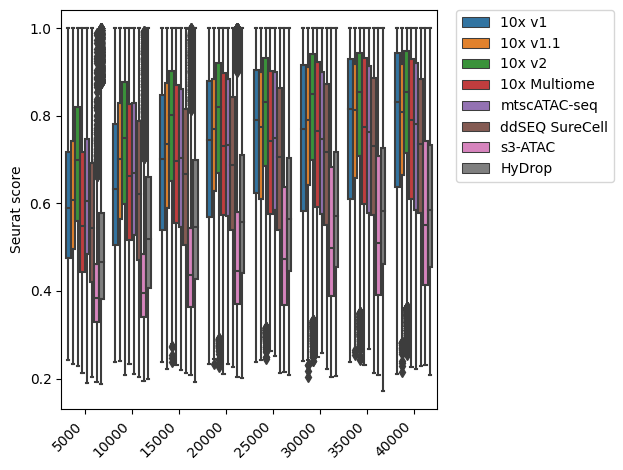

In [8]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    y="cell_type_pred_score",
    x="depth_alias",
    hue="tech",
    hue_order=tech_order,
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Seurat score")
plt.xlabel("")
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels_alias = [cell_type_alias_dict[x] for x in labels]
# ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
plt.tight_layout()

plt.savefig(
    "plts_final/FIXEDCELLS_seurat_scores_celldownsampled.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS_seurat_scores_celldownsampled.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

<AxesSubplot: xlabel='tech', ylabel='cell_type_pred_score'>

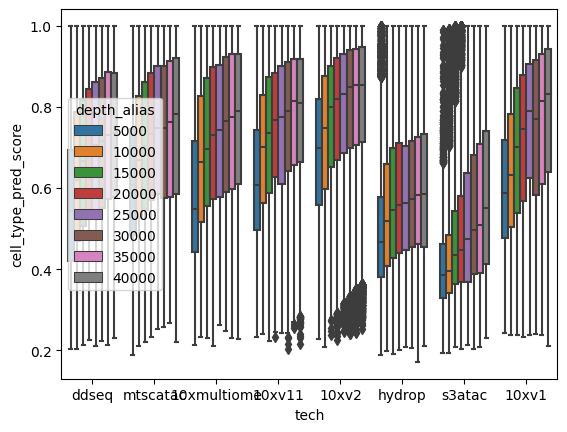

In [9]:
sns.boxplot(df_merged, y="cell_type_pred_score", x="tech", hue="depth_alias")

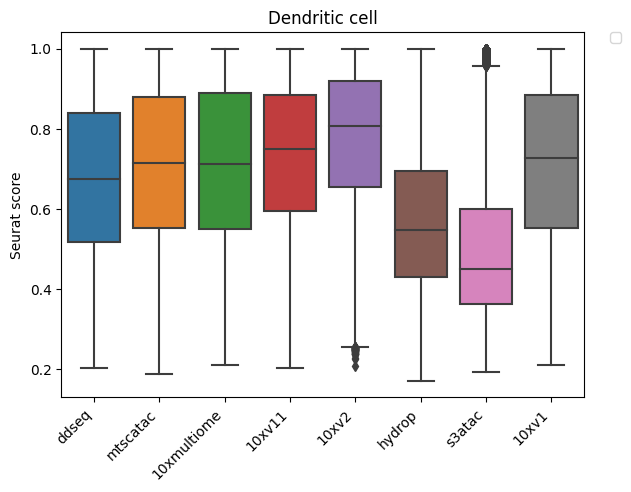

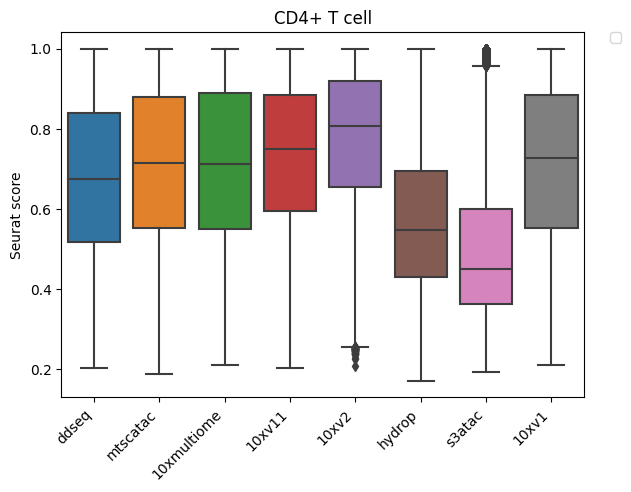

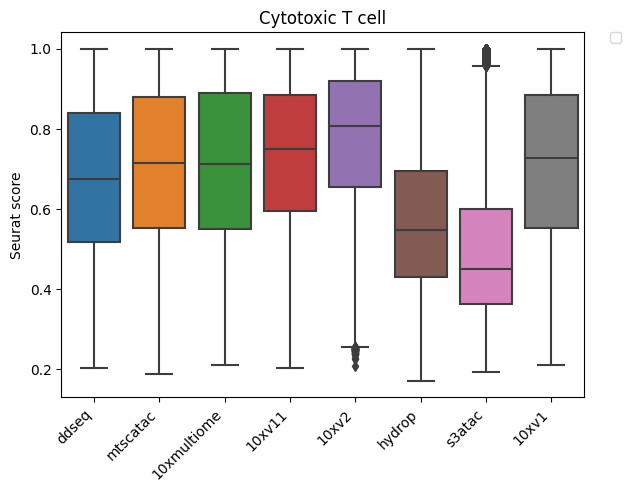

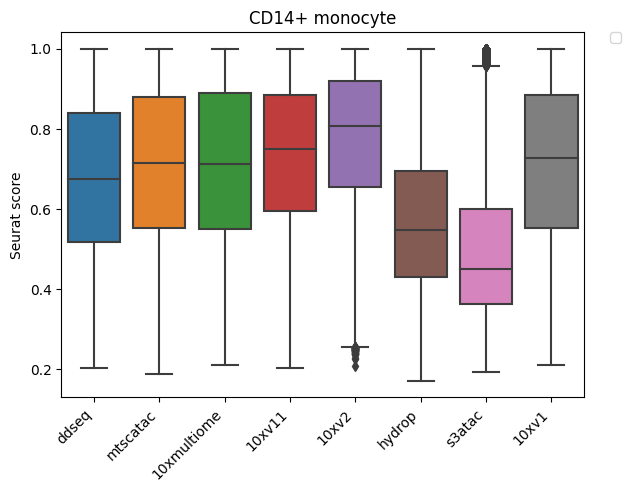

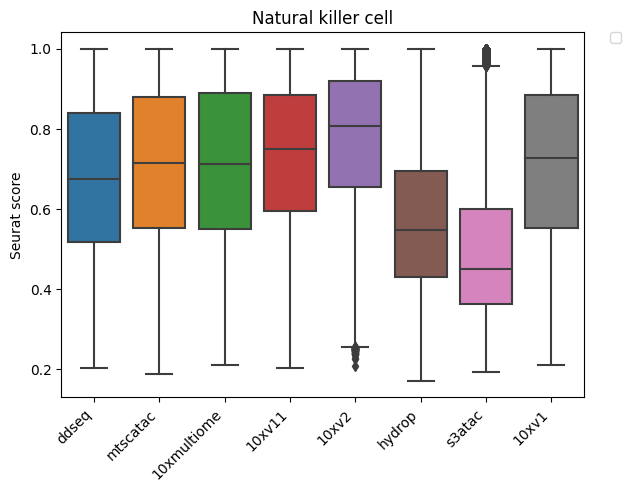

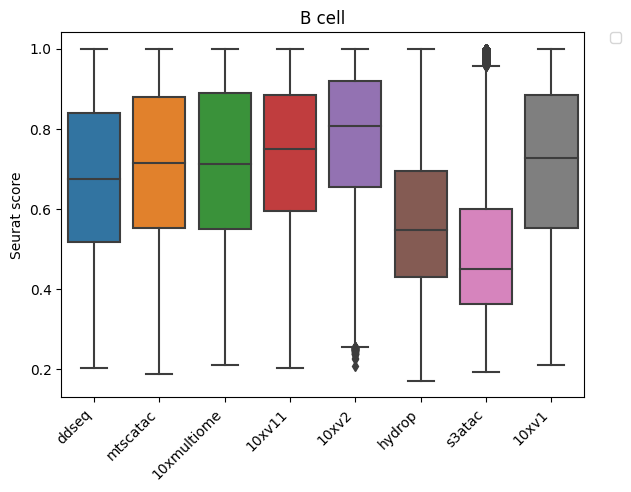

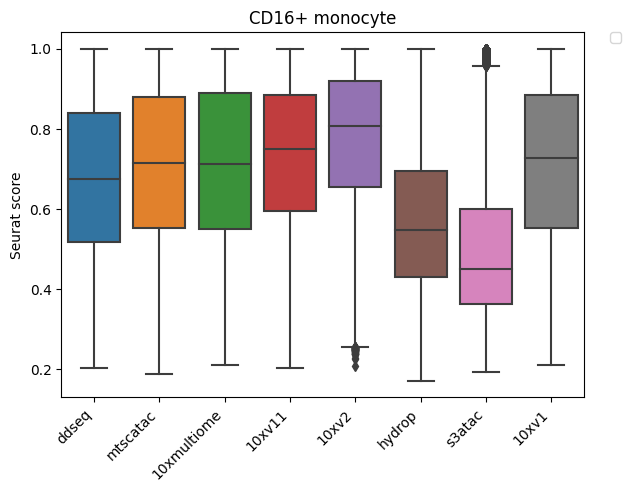

In [10]:
for cell_type in df_merged["cell_type"].unique():
    df_tmp = df_merged[df_merged["cell_type"] == cell_type]
    fig, ax = plt.subplots()
    sns.boxplot(
        df_merged,
        y="cell_type_pred_score",
        x="tech",
    )

    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Seurat score")
    plt.xlabel("")
    # labels = [item.get_text() for item in ax.get_xticklabels()]
    # labels_alias = [cell_type_alias_dict[x] for x in labels]
    # ax.set_xticklabels(labels_alias)

    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(
        handles[0 : len(tech_order)],
        [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
        bbox_to_anchor=(1.05, 1),
        loc=2,
        borderaxespad=0.0,
    )
    plt.tight_layout()
    plt.title(cell_type)

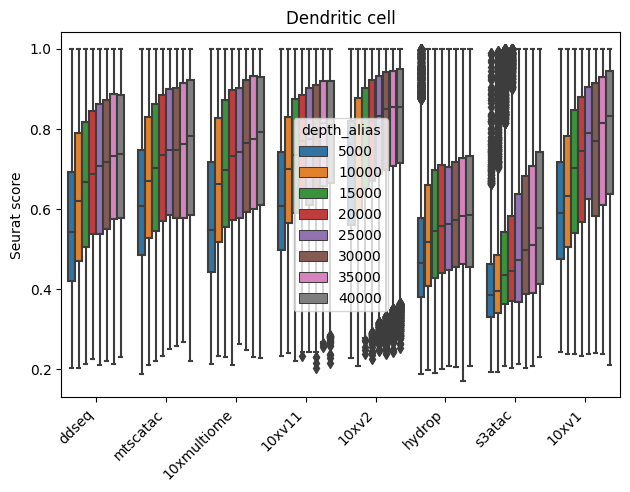

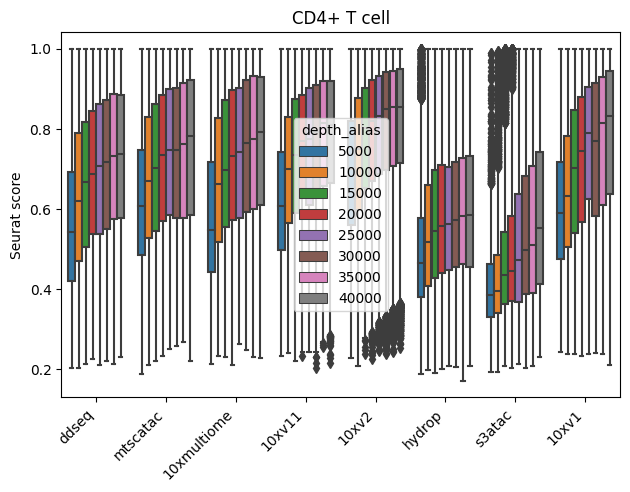

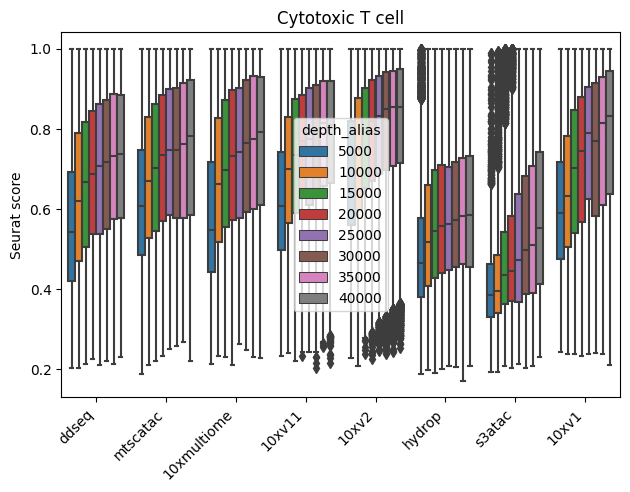

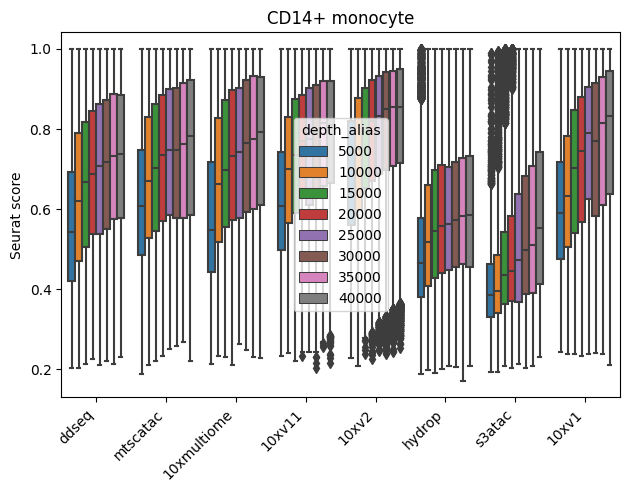

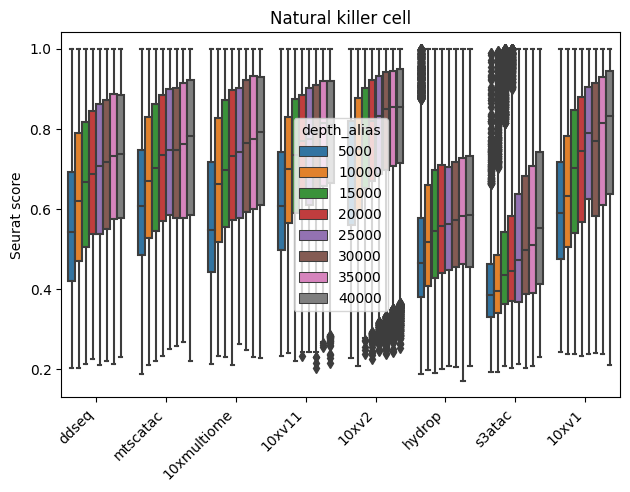

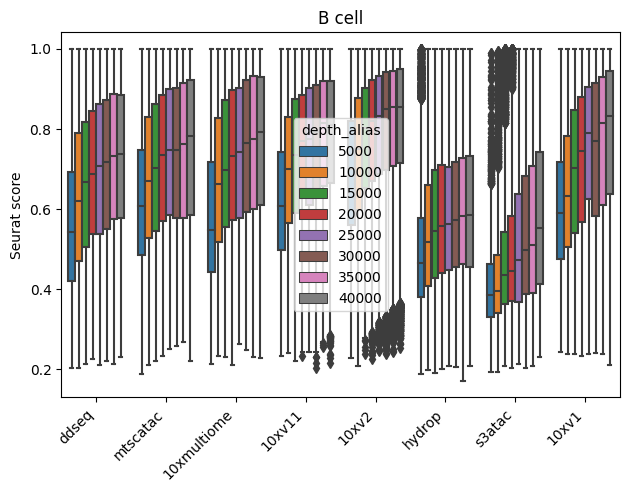

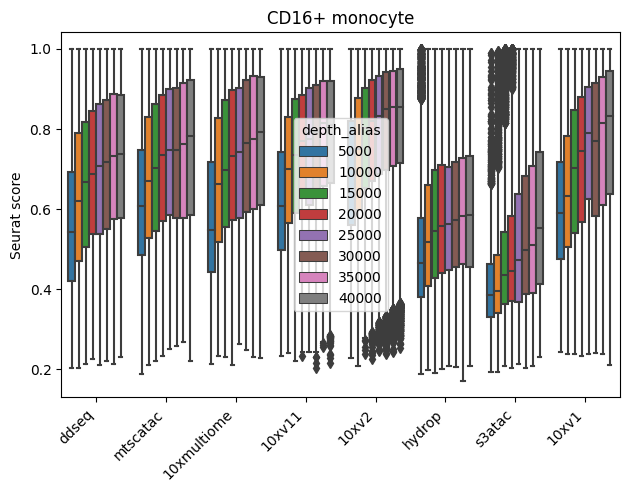

In [11]:
for cell_type in df_merged["cell_type"].unique():
    df_tmp = df_merged[df_merged["cell_type"] == cell_type]
    fig, ax = plt.subplots()
    sns.boxplot(
        df_merged,
        y="cell_type_pred_score",
        x="tech",
        hue="depth_alias",
        # hue_order=tech_order,
    )

    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Seurat score")
    plt.xlabel("")
    # labels = [item.get_text() for item in ax.get_xticklabels()]
    # labels_alias = [cell_type_alias_dict[x] for x in labels]
    # ax.set_xticklabels(labels_alias)

    handles, labels = ax.get_legend_handles_labels()

    plt.tight_layout()
    plt.title(cell_type)

<AxesSubplot: xlabel='cell_type', ylabel='cell_type_pred_score'>

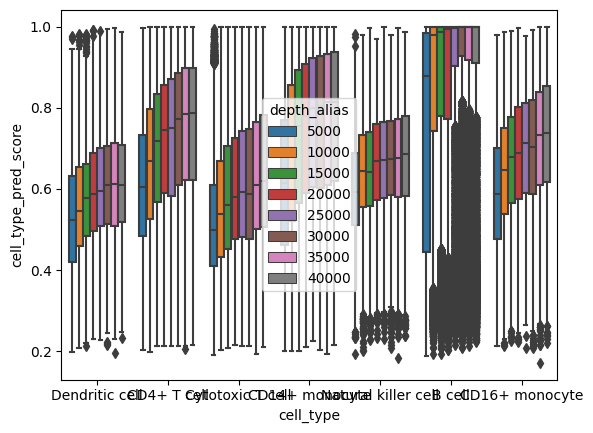

In [12]:
sns.boxplot(df_merged, y="cell_type_pred_score", x="cell_type", hue="depth_alias")

## lineplot

In [13]:
df_merged["supersample"] = [".".join(x.split(".")[:2]) for x in df_merged["sample_id"]]

In [14]:
df_merged_pivot = df_merged.pivot_table(
    columns="depth",
    index="supersample",
    values="cell_type_pred_score",
    aggfunc="median",
)

In [15]:
df_merged_stacked = df_merged_pivot.stack().reset_index()

In [16]:
df_merged_stacked.columns = ["sample", "depth", "seurat"]

In [17]:
df_merged_stacked["depth_int"] = [
    depth_alias_dict[x] for x in df_merged_stacked["depth"]
]

In [18]:
df_merged_stacked["tech"] = [x.split("_")[1] for x in df_merged_stacked["sample"]]

<AxesSubplot: xlabel='depth_int', ylabel='seurat'>

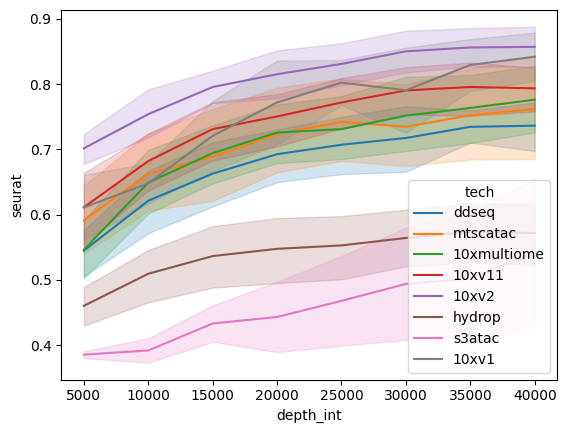

In [19]:
sns.lineplot(df_merged_stacked, x="depth_int", y="seurat", hue="tech")

In [20]:
df_merged_stacked

,sample,depth,seurat,depth_int,tech
0,BIO_ddseq_1.10k,10k,0.575052,10000,ddseq
1,BIO_ddseq_1.15k,15k,0.648881,15000,ddseq
2,BIO_ddseq_1.20k,20k,0.640342,20000,ddseq
3,BIO_ddseq_1.25k,25k,0.670347,25000,ddseq
4,BIO_ddseq_1.30k,30k,0.674402,30000,ddseq
...,...,...,...,...,...
372,VIB_hydrop_2.25k,25k,0.569485,25000,hydrop
373,VIB_hydrop_2.30k,30k,0.558793,30000,hydrop
374,VIB_hydrop_2.35k,35k,0.623807,35000,hydrop
375,VIB_hydrop_2.5k,5k,0.515383,5000,hydrop


In [21]:
df_medians = (
    df_merged_stacked.groupby(["sample", "depth"])["seurat"].median().reset_index()
)
df_medians["depth_int"] = [depth_alias_dict[x] for x in df_medians["depth"]]
df_medians["tech"] = [x.split("_")[1] for x in df_medians["sample"]]

<AxesSubplot: xlabel='depth_int', ylabel='seurat'>

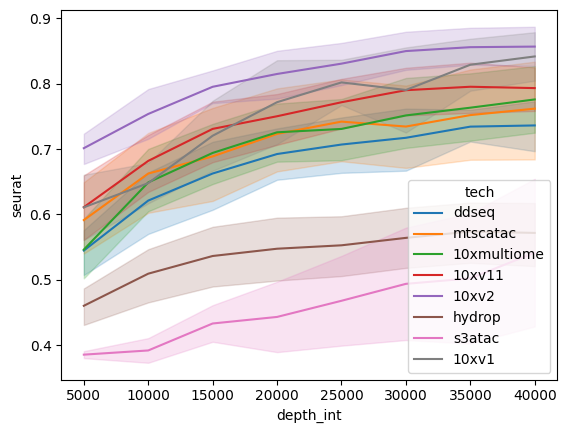

In [22]:
sns.lineplot(df_medians, x="depth_int", y="seurat", hue="tech")

# groupby

In [23]:
cell_type_order = [
    "B_cell",
    "CD14+_monocyte",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Dendritic_cell",
    "Natural_killer_cell",
    "CD16+_monocyte",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (Control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}

tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_color_palette = {
    "10x v2": "#1b9e77",
    "10x v1": "#d95f02",
    "10x v1.1": "#7570b3",
    "10x v1.1 (Control)": "#7570b3",
    "10x Multiome": "#e7298a",
    "mtscATAC-seq": "#66a61e",
    "mtscATAC-seq (FACS)": "#66a61e",
    "Bio-Rad ddSEQ SureCell": "#e6ab02",
    "s3-ATAC": "#a6761d",
    "HyDrop": "#666666",
}

tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v1.1 (Control)",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "mtscATAC-seq (FACS)",
    "Bio-Rad ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

dashes_alias_dict = {
    "10x v1": "",
    "10x v1.1": "",
    "10x v1.1 (Control)": (2, 1),
    "10x v2": "",
    "10x Multiome": "",
    "mtscATAC-seq": "",
    "mtscATAC-seq (FACS)": (2, 1),
    "Bio-Rad ddSEQ SureCell": "",
    "ddSEQ SureCell": "",
    "s3-ATAC": "",
    "HyDrop": "",
}

In [24]:
samples_passing = [
    "BIO_ddseq_1",
    "BIO_ddseq_2",
    "BIO_ddseq_3",
    "BIO_ddseq_4",
    "BRO_mtscatacfacs_1",
    "BRO_mtscatacfacs_2",
    "CNA_10xmultiome_1",
    "CNA_10xmultiome_2",
    "CNA_10xv11_1",
    "CNA_10xv11_2",
    "CNA_10xv11_3",
    "CNA_10xv2_1",
    "CNA_10xv2_2",
    "CNA_mtscatac_1",
    "EPF_hydrop_1",
    "EPF_hydrop_2",
    "EPF_hydrop_3",
    "EPF_hydrop_4",
    "HAR_ddseq_1",
    "HAR_ddseq_2",
    "MDC_mtscatac_1",
    "MDC_mtscatac_2",
    "OHS_s3atac_1",
    "SAN_10xmultiome_1",
    "SAN_10xmultiome_2",
    "TXG_10xv11_1",
    "TXG_10xv2_1",
    "TXG_10xv2_2",
    "UCS_ddseq_1",
    "UCS_ddseq_2",
    "VIB_10xv1_1",
    "VIB_10xv1_2",
    "VIB_10xv2_1",
    "VIB_10xv2_2",
    "VIB_hydrop_2",
]

In [25]:
df_merged["sample_id"] = [
    x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
    .replace("CNA_10xv11_5", "CNA_10xv11c_2")
    .replace("BRO_mtscatac", "BRO_mtscatacfacs")
    for x in df_merged["sample_id"]
]
df_merged["supersample"] = [x.split(".")[0] for x in df_merged["sample_id"]]
df_merged["depth_int"] = [depth_alias_dict[x] for x in df_merged["depth"]]
df_merged["tech"] = [x.split("_")[1] for x in df_merged["supersample"]]

In [26]:
df_merged

,composite_sample_id,barcode,sample_id,cell_type,cell_type_pred_score,cell_type_hiconf_70,depth,depth_alias,tech,supersample,depth_int
0,AATTCCATACCGAAGGTAACA_GATAGACTTTCCTATTATCAT_TG...,AATTCCATACCGAAGGTAACA_GATAGACTTTCCTATTATCAT_TG...,BIO_ddseq_1.10k,Dendritic cell,0.782573,Dendritic cell,10k,10000,ddseq,BIO_ddseq_1,10000
1,ACAGCTTTATACTTCTATTCG_GAACCGTAATGATTGCTCCAA_GC...,ACAGCTTTATACTTCTATTCG_GAACCGTAATGATTGCTCCAA_GC...,BIO_ddseq_1.10k,CD4+ T cell,0.531427,Unknown,10k,10000,ddseq,BIO_ddseq_1,10000
2,CTAGAGCCTTCATCTTGGACT_GAGAGGTCATGTATGTCGGTT_TC...,CTAGAGCCTTCATCTTGGACT_GAGAGGTCATGTATGTCGGTT_TC...,BIO_ddseq_1.10k,CD4+ T cell,0.424179,Unknown,10k,10000,ddseq,BIO_ddseq_1,10000
3,AATGATTATAGGCAGCCTTTG_ACTACGAGTCCTTCGTCCTTC_CG...,AATGATTATAGGCAGCCTTTG_ACTACGAGTCCTTCGTCCTTC_CG...,BIO_ddseq_1.10k,Cytotoxic T cell,0.462097,Unknown,10k,10000,ddseq,BIO_ddseq_1,10000
4,CGATTACTAACGCCTCATACA_GGTTAGTCCGCGATAGTTTCT-BI...,CGATTACTAACGCCTCATACA_GGTTAGTCCGCGATAGTTTCT,BIO_ddseq_1.10k,CD4+ T cell,0.674511,Unknown,10k,10000,ddseq,BIO_ddseq_1,10000
...,...,...,...,...,...,...,...,...,...,...,...
2944,GACGAGGTAAGATGGCCAAC-2-VIB_hydrop_2.5k,GACGAGGTAAGATGGCCAAC-2,VIB_hydrop_2.5k,Cytotoxic T cell,0.367369,Unknown,5k,5000,hydrop,VIB_hydrop_2,5000
2945,AGGTTGCATTATCCGAGTAT-2-VIB_hydrop_2.5k,AGGTTGCATTATCCGAGTAT-2,VIB_hydrop_2.5k,Cytotoxic T cell,0.588569,Unknown,5k,5000,hydrop,VIB_hydrop_2,5000
2946,TCAAGAGGCGAGGACGTTCG-2-VIB_hydrop_2.5k,TCAAGAGGCGAGGACGTTCG-2,VIB_hydrop_2.5k,Cytotoxic T cell,0.833194,Cytotoxic T cell,5k,5000,hydrop,VIB_hydrop_2,5000
2947,GGAGTATTCTCAAGACGTCT-2-VIB_hydrop_2.5k,GGAGTATTCTCAAGACGTCT-2,VIB_hydrop_2.5k,Cytotoxic T cell,0.559246,Unknown,5k,5000,hydrop,VIB_hydrop_2,5000


In [27]:
df_merged_sub = df_merged[df_merged["supersample"].isin(samples_passing)]

In [28]:
df_merged_sub

,composite_sample_id,barcode,sample_id,cell_type,cell_type_pred_score,cell_type_hiconf_70,depth,depth_alias,tech,supersample,depth_int
0,AATTCCATACCGAAGGTAACA_GATAGACTTTCCTATTATCAT_TG...,AATTCCATACCGAAGGTAACA_GATAGACTTTCCTATTATCAT_TG...,BIO_ddseq_1.10k,Dendritic cell,0.782573,Dendritic cell,10k,10000,ddseq,BIO_ddseq_1,10000
1,ACAGCTTTATACTTCTATTCG_GAACCGTAATGATTGCTCCAA_GC...,ACAGCTTTATACTTCTATTCG_GAACCGTAATGATTGCTCCAA_GC...,BIO_ddseq_1.10k,CD4+ T cell,0.531427,Unknown,10k,10000,ddseq,BIO_ddseq_1,10000
2,CTAGAGCCTTCATCTTGGACT_GAGAGGTCATGTATGTCGGTT_TC...,CTAGAGCCTTCATCTTGGACT_GAGAGGTCATGTATGTCGGTT_TC...,BIO_ddseq_1.10k,CD4+ T cell,0.424179,Unknown,10k,10000,ddseq,BIO_ddseq_1,10000
3,AATGATTATAGGCAGCCTTTG_ACTACGAGTCCTTCGTCCTTC_CG...,AATGATTATAGGCAGCCTTTG_ACTACGAGTCCTTCGTCCTTC_CG...,BIO_ddseq_1.10k,Cytotoxic T cell,0.462097,Unknown,10k,10000,ddseq,BIO_ddseq_1,10000
4,CGATTACTAACGCCTCATACA_GGTTAGTCCGCGATAGTTTCT-BI...,CGATTACTAACGCCTCATACA_GGTTAGTCCGCGATAGTTTCT,BIO_ddseq_1.10k,CD4+ T cell,0.674511,Unknown,10k,10000,ddseq,BIO_ddseq_1,10000
...,...,...,...,...,...,...,...,...,...,...,...
2944,GACGAGGTAAGATGGCCAAC-2-VIB_hydrop_2.5k,GACGAGGTAAGATGGCCAAC-2,VIB_hydrop_2.5k,Cytotoxic T cell,0.367369,Unknown,5k,5000,hydrop,VIB_hydrop_2,5000
2945,AGGTTGCATTATCCGAGTAT-2-VIB_hydrop_2.5k,AGGTTGCATTATCCGAGTAT-2,VIB_hydrop_2.5k,Cytotoxic T cell,0.588569,Unknown,5k,5000,hydrop,VIB_hydrop_2,5000
2946,TCAAGAGGCGAGGACGTTCG-2-VIB_hydrop_2.5k,TCAAGAGGCGAGGACGTTCG-2,VIB_hydrop_2.5k,Cytotoxic T cell,0.833194,Cytotoxic T cell,5k,5000,hydrop,VIB_hydrop_2,5000
2947,GGAGTATTCTCAAGACGTCT-2-VIB_hydrop_2.5k,GGAGTATTCTCAAGACGTCT-2,VIB_hydrop_2.5k,Cytotoxic T cell,0.559246,Unknown,5k,5000,hydrop,VIB_hydrop_2,5000


In [29]:
sns.set_context("notebook")

In [30]:
df_merged_means = (
    df_merged_sub.groupby(["tech", "depth", "cell_type"]).median().reset_index()
)
df_merged_means.index = df_merged_means["tech"] + "." + df_merged_means["depth"]
df_merged_means["tech_alias"] = [tech_alias_dict[x] for x in df_merged_means["tech"]]
df_merged_means = df_merged_means.sort_values("depth_int")

/tmp/ipykernel_1074196/370374895.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged_sub.groupby(["tech", "depth", "cell_type"]).median().reset_index()


In [31]:
df_merged_means["tech"].unique()

array(['10xv1', 'mtscatacfacs', '10xmultiome', '10xv2', 'mtscatac',
       '10xv11', 'hydrop', 'ddseq', 's3atac'], dtype=object)

In [32]:
cell_type_alias_order = [cell_type_alias_dict[x] for x in cell_type_order]
cell_type_alias_order

['B cells',
 'CD14+ monocytes',
 'Naive T cells',
 'Cytotoxic T cells',
 'Dendritic cells',
 'NK cells',
 'CD16+ monocytes']

In [33]:
df_merged_means["cell_type"] = [
    (x + "s")
    .replace("ss", "s")
    .replace("ss", "s")
    .replace("CD4+ T cells", "Naive T cells")
    for x in df_merged_means["cell_type"]
]

In [34]:
cell_type_alias_order = [
    "B cells",
    "CD14+ monocytes",
    "Naive T cells",
    "Cytotoxic T cells",
    "Dendritic cells",
    "Natural killer cells",
    "CD16+ monocytes",
]

In [35]:
df_merged_means["cell_type"].unique()

array(['Natural killer cells', 'CD16+ monocytes', 'CD14+ monocytes',
       'Dendritic cells', 'Cytotoxic T cells', 'Naive T cells', 'B cells'],
      dtype=object)

In [36]:
df_merged_means["depth"] = [
    x.replace("FIXEDCELLS", "40k") for x in df_merged_means["depth"]
]

In [37]:
df_merged_means

,tech,depth,cell_type,cell_type_pred_score,depth_alias,depth_int,tech_alias
10xv1.5k,10xv1,5k,Natural killer cells,0.604599,5000.0,5000.0,10x v1
mtscatacfacs.5k,mtscatacfacs,5k,CD16+ monocytes,0.631035,5000.0,5000.0,mtscATAC-seq (FACS)
mtscatacfacs.5k,mtscatacfacs,5k,CD14+ monocytes,0.654132,5000.0,5000.0,mtscATAC-seq (FACS)
10xmultiome.5k,10xmultiome,5k,Natural killer cells,0.513394,5000.0,5000.0,10x Multiome
10xmultiome.5k,10xmultiome,5k,Dendritic cells,0.521149,5000.0,5000.0,10x Multiome
...,...,...,...,...,...,...,...
mtscatac.FIXEDCELLS,mtscatac,40k,B cells,0.996526,40000.0,40000.0,mtscATAC-seq
10xv11.FIXEDCELLS,10xv11,40k,B cells,1.000000,40000.0,40000.0,10x v1.1
10xv11.FIXEDCELLS,10xv11,40k,CD14+ monocytes,0.842905,40000.0,40000.0,10x v1.1
10xv1.FIXEDCELLS,10xv1,40k,Natural killer cells,0.758451,40000.0,40000.0,10x v1


B cells
CD14+ monocytes
Naive T cells
Cytotoxic T cells
Dendritic cells
Natural killer cells
CD16+ monocytes


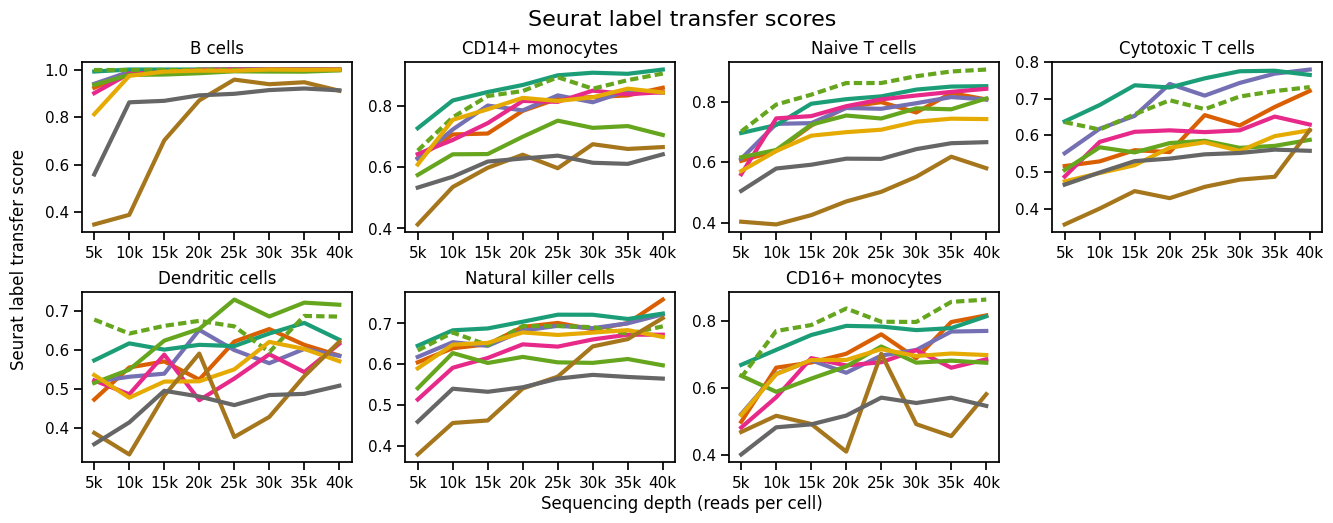

In [38]:
base_size = 4
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(base_size * n_cols, base_size * n_rows * 0.65),
    # sharey=True,
    # sharex=True,
)
fig.subplots_adjust(hspace=0.35)
# fig.subplots_adjust(wspace=0.2)
fontsize_large = 18
for cell_type in cell_type_alias_order:
    print(cell_type)
    ax = axes.flatten()[cell_type_alias_order.index(cell_type)]
    # print(cell_type_alias_order.index(cell_type))
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]
    # print(df_tmp)

    sns.lineplot(
        data=df_tmp,
        x="depth",
        y="cell_type_pred_score",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes_alias_dict,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type)
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

    # ax.set_ylim([0.3, 1.1])

fig.suptitle("Seurat label transfer scores", fontsize=16)
fig.text(0.5, 0.02, "Sequencing depth (reads per cell)", ha="center", fontsize=12)
fig.text(
    0.08,
    0.5,
    "Seurat label transfer score",
    va="center",
    rotation="vertical",
    fontsize=12,
)
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()

plt.savefig("plts/seurat_dependency.svg", dpi=600, facecolor="w")
plt.savefig("plts/seurat_dependency.png", dpi=600, facecolor="w")

plt.show()

In [42]:
df_merged_means[["tech", "depth", "cell_type", "cell_type_pred_score"]].to_csv(
    "derop_sourcedata_extendedfig8a.csv"
)

In [41]:
df_merged_means

,tech,depth,cell_type,cell_type_pred_score,depth_alias,depth_int,tech_alias
10xv1.5k,10xv1,5k,Natural killer cells,0.604599,5000.0,5000.0,10x v1
mtscatacfacs.5k,mtscatacfacs,5k,CD16+ monocytes,0.631035,5000.0,5000.0,mtscATAC-seq (FACS)
mtscatacfacs.5k,mtscatacfacs,5k,CD14+ monocytes,0.654132,5000.0,5000.0,mtscATAC-seq (FACS)
10xmultiome.5k,10xmultiome,5k,Natural killer cells,0.513394,5000.0,5000.0,10x Multiome
10xmultiome.5k,10xmultiome,5k,Dendritic cells,0.521149,5000.0,5000.0,10x Multiome
...,...,...,...,...,...,...,...
mtscatac.FIXEDCELLS,mtscatac,40k,B cells,0.996526,40000.0,40000.0,mtscATAC-seq
10xv11.FIXEDCELLS,10xv11,40k,B cells,1.000000,40000.0,40000.0,10x v1.1
10xv11.FIXEDCELLS,10xv11,40k,CD14+ monocytes,0.842905,40000.0,40000.0,10x v1.1
10xv1.FIXEDCELLS,10xv1,40k,Natural killer cells,0.758451,40000.0,40000.0,10x v1


In [39]:
selected_celltypes = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
]
selected_celltypes_alias = [cell_type_alias_dict[x] for x in selected_celltypes]
selected_celltypes_alias = [
    "B cells",
    "Naive T cells",
    "Cytotoxic T cells",
    "Natural killer cells",
]

B cells
Naive T cells
Cytotoxic T cells
Natural killer cells


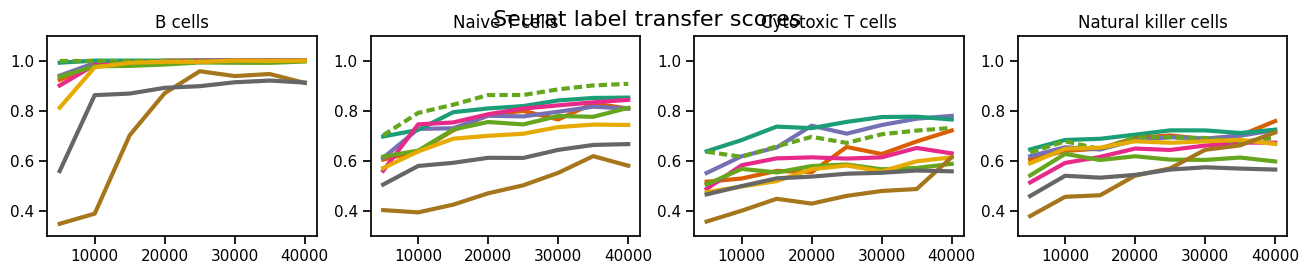

In [40]:
base_size = 4
n_cols = 4
n_rows = 1
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(base_size * n_cols, base_size * n_rows * 0.65),
    # sharey=True,
    # sharex=True,
)
fig.subplots_adjust(hspace=0.35)
# fig.subplots_adjust(wspace=0.2)
fontsize_large = 18
for cell_type in selected_celltypes_alias:
    print(cell_type)
    ax = axes.flatten()[selected_celltypes_alias.index(cell_type)]
    # print(cell_type_alias_order.index(cell_type))
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]
    # print(df_tmp)

    sns.lineplot(
        data=df_tmp,
        x="depth_int",
        y="cell_type_pred_score",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes_alias_dict,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type)
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

    ax.set_ylim([0.3, 1.1])

fig.suptitle("Seurat label transfer scores", fontsize=16)
# fig.text(0.5, 0.02, "Total number of cells", ha="center", fontsize=12)
# fig.text(
#     0.08,
#     0.5,
#     "Seurat label transfer score",
#     va="center",
#     rotation="vertical",
#     fontsize=12,
# )
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()

plt.savefig("plts/seurat_dependency_selectedcells.svg", dpi=600, facecolor="w")
plt.savefig("plts/seurat_dependency_selectedcells.png", dpi=600, facecolor="w")

plt.show()